<h1>Early Blight Tomato Disease from RGB To HSV </h1>

In [1]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math


In [4]:
#image 1 conversion
eb1=cv2.cvtColor(cv2.imread('EB1.jpg'),cv2.COLOR_BGR2RGB)
row,col,pixNum=eb1.shape
eb1Dup=eb1.copy().reshape(row*col,3)

for index,pixel in enumerate(eb1Dup):
    r,g,b=[int(x)/255 for x in pixel]

    #calculating cmax and cmin
    cmax=max(r,g,b)
    cmin=min(r,g,b)
    diff=cmax-cmin
    
    #calculating hue
    if cmax==cmin:
        h=0
    elif cmax==r:
        h=(60*((g-b)/diff)+360)%360
    elif cmax==g:
        h=(60*((b-r)/diff)+120)%360
    elif cmax==b:
        h=(60*((r-g)/diff)+240)%360
    h/=2
    
    #calculating saturation
    if cmax==0:
        s=0
    else:
        s=(diff/cmax)*255
    #calculating value /brightness
    v=cmax*255
    
    eb1Dup[index]=[np.uint8(h),np.uint8(s),np.uint8(v)]

eb1Dup=eb1Dup.reshape(256,256,3)
#this is corrupted image as hsv doesnt show the image in this form its just a way to represent image

    

<h2>H CHANNEL VISUALIZATION</h2>

<h2>H channel gray scale</h2>

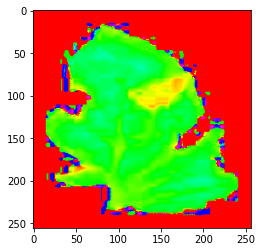

In [5]:
#extracting h values from the image in rgb format
h_channel=eb1Dup[:,:,0]


h_channel=h_channel.reshape(row*col)

h_channel_new=[]
for _,h in enumerate(h_channel):
    h1=[h,255,255]
    h_channel_new.append(h1)
h_channel_new=np.array(h_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

#plotting the h channel
plt.imshow(cv2.cvtColor(h_channel_new,cv2.COLOR_HSV2RGB))

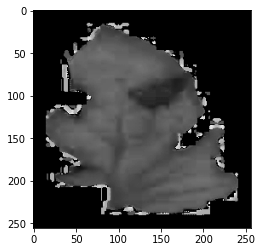

In [6]:
h_channel_gray=eb1Dup[:,:,0]
plt.imshow(h_channel_gray,cmap='gray')

<h2>S Channel Visualization</h2>

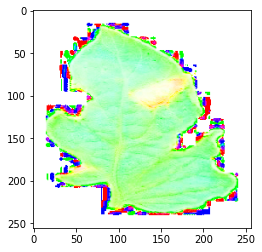

In [7]:
s_channel=eb1Dup[:,:,1]

s_channel=s_channel.reshape(row*col)
s_channel_new=[]
for index,s in enumerate(s_channel):
    s=[h_channel[index],s,255]
    s_channel_new.append(s)
s_channel_new=np.array(s_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

plt.imshow(cv2.cvtColor(s_channel_new,cv2.COLOR_HSV2RGB))
# plt.imshow(s_channel)

<h2>S Channel Gray-Scale </h2>

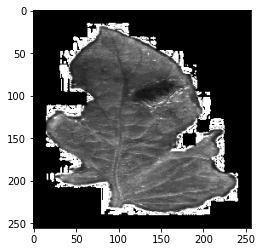

In [8]:
s_channel_gray=eb1Dup[:,:,1]
plt.imshow(s_channel_gray,cmap='gray')

<h2>Brightness Channel</h2>

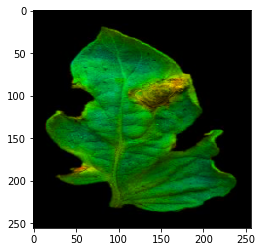

In [9]:
v_channel=eb1Dup[:,:,2]
v_channel=v_channel.reshape(row*col)
v_channel_new=[]
for index,v in enumerate(v_channel):
    v1=[h_channel[index],255,v]
    v_channel_new.append(v1)
v_channel_new=np.array(v_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

plt.imshow(cv2.cvtColor(v_channel_new,cv2.COLOR_HSV2RGB),cmap='gray')

<h2>Brightness Channel Grey-Scale</h2>

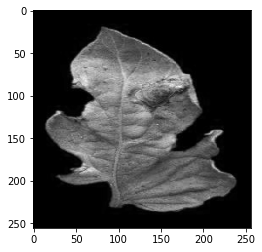

In [10]:
v_channel_gray=eb1Dup[:,:,2]
plt.imshow(v_channel_gray,cmap='gray')

<h2>Comparing our result with inbuild function</h2>

In [17]:

eb2=cv2.imread('EB1.jpg')
eb2=cv2.cvtColor(cv2.cvtColor(eb2,cv2.COLOR_BGR2RGB),cv2.COLOR_RGB2HSV)




<h2>H scale visualization Gray Scale</h2>

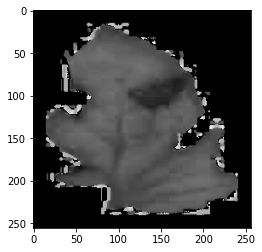

In [18]:
h_channel_2=eb2[:,:,0]
plt.imshow(h_channel_2,cmap='gray')

<h2>H Scale Visualization colored</h2>

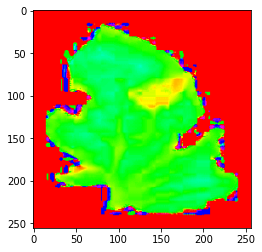

In [19]:
h_channel_2=h_channel_2.reshape(row*col)

h_channel_new=[]
for _,h in enumerate(h_channel_2):
    h1=[h,255,255]
    h_channel_new.append(h1)
h_channel_new=np.array(h_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

#plotting the h channel
plt.imshow(cv2.cvtColor(h_channel_new,cv2.COLOR_HSV2RGB))

<h2>S channel visualization Gray</h2>

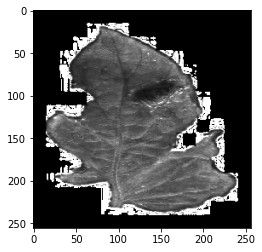

In [20]:
s_channel_2=eb2[:,:,1]
plt.imshow(s_channel_2,cmap='gray')

## S channel visualization rgb

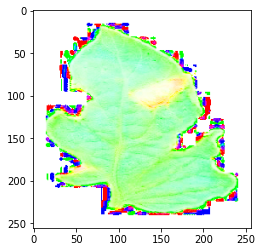

In [21]:
s_channel_2=s_channel_2.reshape(row*col)
s_channel_new=[]
for index,s in enumerate(s_channel_2):
    s=[h_channel[index],s,255]
    s_channel_new.append(s)
s_channel_new=np.array(s_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

plt.imshow(cv2.cvtColor(s_channel_new,cv2.COLOR_HSV2RGB))

##  V channel visualization Gray

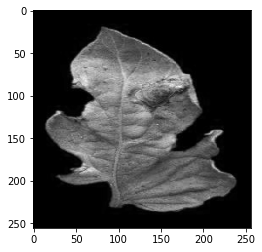

In [22]:
v_channel_2=eb2[:,:,2]
plt.imshow(v_channel_2,cmap='gray')

## V channel Visualization RGB

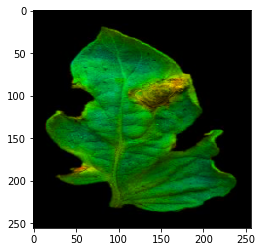

In [23]:
v_channel_2=v_channel_2.reshape(row*col)
v_channel_new=[]
for index,v in enumerate(v_channel_2):
    v1=[h_channel[index],255,v]
    v_channel_new.append(v1)
v_channel_new=np.array(v_channel_new,dtype=np.uint8).reshape(row,col,pixNum)

plt.imshow(cv2.cvtColor(v_channel_new,cv2.COLOR_HSV2RGB),cmap='gray')

<h1>Thresholding</h1>

<p>Now we will threshold the image based on the h channel</p>

<h2>Plotting the histogram</h2>

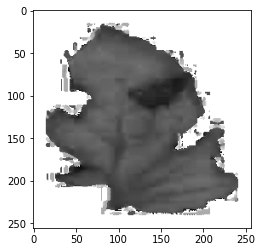

In [113]:
image=cv2.cvtColor(cv2.imread('EB1.jpg'),cv2.COLOR_BGR2HSV)
#extracting the h channel
h_channel=image[:,:,0]

#improving the contrast of the image
rows,cols=h_channel.shape
h_channel=h_channel.reshape(rows*cols)
minP,maxP=np.amin(h_channel),np.amax(h_channel)

#min-max contrast enhancement
for index,pixel in enumerate(h_channel):
    h_channel[index]=(((pixel-minP)/(maxP-minP)))*255
    if pixel==0:
        h_channel[index]=255
h_channel=h_channel.reshape(rows,cols)
plt.imshow(h_channel,cmap='gray')

totalLeafPix=0
#calculating total leaf area
for inde,pixel in enumerate(h_channel.flatten()):
    if pixel==255:
        continue
    totalLeafPix+=1

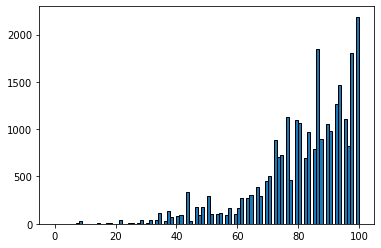

In [116]:
#plotting the histogram
histo,bins,_=plt.hist(h_channel.flat,bins=100,range=(0,100),ec='black')
plt.show()

<h2>Finding the global Maxima</h2>

In [117]:
#histogram peak
maxHisto=np.amax(histo)
#starting index of the bin
maxBin=bins[np.where(histo==maxHisto)][0]
print('Bin is {}'.format(maxBin))
if maxBin<=40:
    maxVal=0.2*maxHisto
else:
    maxVal=0.5*maxHisto
print(maxVal)

#calculating R
import math
maxi=-math.inf
maxV=-math.inf
for index,ele in enumerate(histo):
    if ele >maxVal and ele !=maxHisto and ele>maxV:
        maxi=bins[index]
        maxV=ele
      
r=maxi
if r==(-math.inf):
    r=maxBin
print(r)
#calculating s
s=2*r/3
threshold=s
print(s)
print(threshold)

Bin is 99.0
1094.5
86.0
57.333333333333336
57.333333333333336


(256, 256)


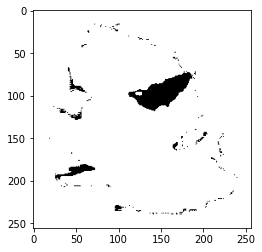

In [118]:
print(h_channel.shape)
rows,cols=h_channel.shape
h_channel=h_channel.reshape(rows*cols)

for index,pixel in enumerate(h_channel):
    if pixel<threshold:
        h_channel[index]=0
    else:
        h_channel[index]=255
h_channel=h_channel.reshape(rows,cols)
plt.imshow(h_channel,cmap='gray')



<h2>Quantification</h2>

In [119]:
#calculating the black pixels
count=0
for index,ele in enumerate(h_channel.flatten()):
    if ele==0:
        count+=1
print('Diseased Pixel Count : {}\n\n'.format(count))
print('Healthy Pixel Count : {}\n\n'.format(totalLeafPix))

percentage=(count/totalLeafPix)*100

print('Percentage of leaf disease : {}\n\n'.format(percentage))


    

Diseased Pixel Count : 2482


Healthy Pixel Count : 33920


Percentage of leaf disease : 7.317216981132075


